# Objective:
### To forecast Co2 levels for an organization so that the organization can follow government norms with respect to Co2 emission levels.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas import Grouper
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller




import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
Df=pd.read_excel('CO2 dataset.xlsx')
Df

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


## Data Understanding

In [3]:
Df.shape

(215, 2)

In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [5]:
Df.head(10)

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
5,1805.0,0.00536
6,1806.0,0.00529
7,1807.0,0.00523
8,1808.0,0.00517
9,1809.0,0.00511


In [6]:
Df.tail(10)

,Year,CO2
205,2005.0,17.3
206,2006.0,16.7
207,2007.0,16.8
208,2008.0,16.8
209,2009.0,15.9
210,2010.0,15.6
211,2011.0,15.6
212,2012.0,14.8
213,2013.0,14.7
214,2014.0,15.1


In [7]:
Df['Year'] = Df['Year'].astype(int)
Df

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [8]:
Df['Year']=pd.to_datetime(Df.Year,format='%Y')
Df

,Year,CO2
0,1800-01-01,0.00568
1,1801-01-01,0.00561
2,1802-01-01,0.00555
3,1803-01-01,0.00548
4,1804-01-01,0.00542
...,...,...
210,2010-01-01,15.60000
211,2011-01-01,15.60000
212,2012-01-01,14.80000
213,2013-01-01,14.70000


In [9]:
df=pd.read_excel('CO2 dataset.xlsx')
df

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


In [10]:
df.isna().sum()

Year    0
CO2     0
dtype: int64

### There is no NA Values  checking All other missing values

In [11]:
df[df['Year']=='?'].any()

Year    False
CO2     False
dtype: bool

In [12]:
df[df['CO2']=='?'].any()

Year    False
CO2     False
dtype: bool

In [13]:
df[df['Year']=='Nan'].any()

Year    False
CO2     False
dtype: bool

In [14]:
df[df['CO2']=='Null'].any()

Year    False
CO2     False
dtype: bool

##### We Can clearly see that,there is no Nan or '0' or '?" Values in our dataset

#### Let's Check Duplicate Values in Data

In [15]:
df.duplicated().sum()

0

##### we Can see there is no duplicate value in our dataset

### Descriptive Analysis

In [16]:
df.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


### Checking Correlation between Dependent & Independent Variable

In [17]:
df.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


##### Check by Visualizing the Heatmap

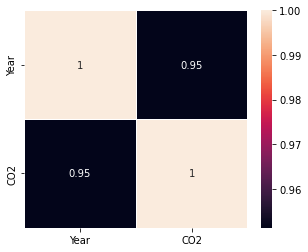

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True,linewidths=.5)
plt.show()

##### Year is highly correlated to Co2

### Outlier Detection

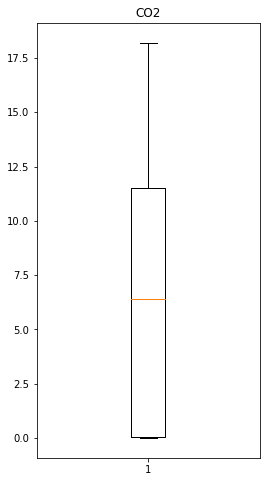

In [19]:
plt.figure(figsize=(4,8))
box = plt.boxplot(df.CO2)
plt.title("CO2")
plt.show()

### We can see the variable is skewed. So, we will use interquantile range to find outliers.

In [20]:
data=df.CO2
Mean=np.mean(data)
Std=np.std(data)
print('Mean of the dataset is',Mean)
print('Std.Deviation of the dataset is',Std)

Mean of the dataset is 6.741970186046512
Std.Deviation of the dataset is 6.507250716848661


In [21]:
threshold = 3
outlier = []
for i in data:
    z = (i-Mean)/Std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


In [22]:
threshold = 3
outlier = []
for i in data:
    z = (i-Mean)/Std
    if z > threshold:
        outlier.append(i)
    elif z < -(threshold):
        outlier.append(i)
if len(outlier) == 0:
        print('No Outlier Found')
else:
        print('outlier in dataset is', outlier)

No Outlier Found


### We can observe that,following points
   - There are no outliers above the positive upper extreme whisker.
   - There are no outliers below the negative side of the lower whisker
   - The data looks right skewed which means there are extreme values that do not follow the regular trend of the data.

### Univariate Analysis

##### Histrogram Plot

<AxesSubplot:>

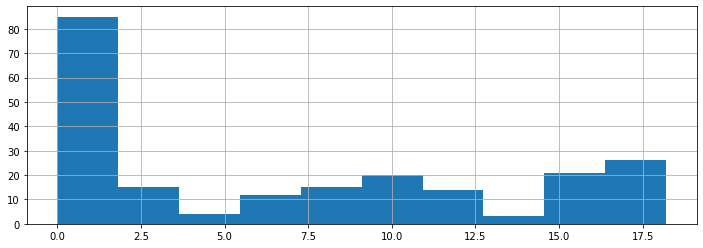

In [23]:
df['CO2'].hist(figsize=(12,4))

<AxesSubplot:xlabel='CO2', ylabel='Density'>

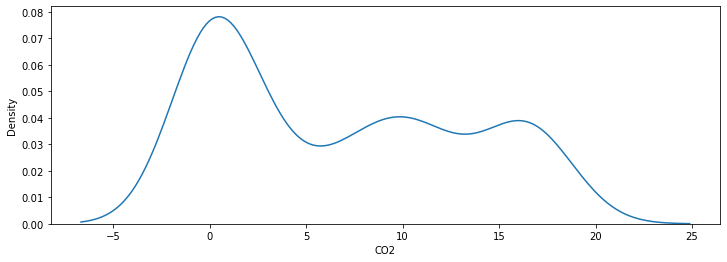

In [24]:
plt.figure(figsize=(12,4))
sns.distplot(df['CO2'], hist=False)

#### 
    - We can see that the frequencies of number of CO2 are continious
    - As the number of CO2 emission increases, there is no gradual drop in the frequency of that number of CO2 found to be decreasing.

### Bivariate Analysis

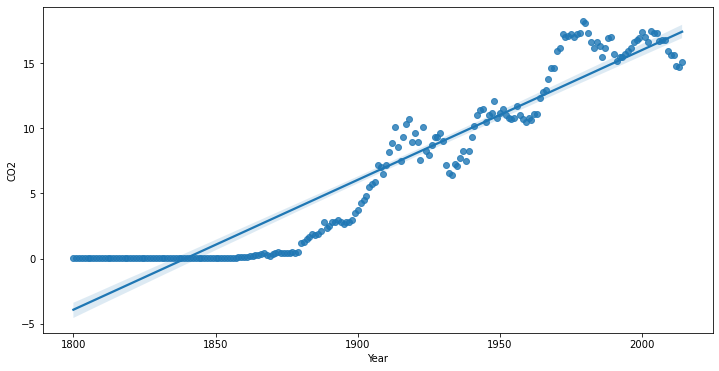

<Figure size 864x432 with 0 Axes>

In [25]:
plt.figure(figsize=(12,6))
sns.regplot(df['Year'],df['CO2'])
plt.figure(figsize=(12,6))
plt.show()

#### We can see that,there is an increasing Trend.So,Trend is not a constant.
#### Also,varience is also not constant.
#### Hence,time series is not stationary.

## Additive Seasonal Decomposition Plot

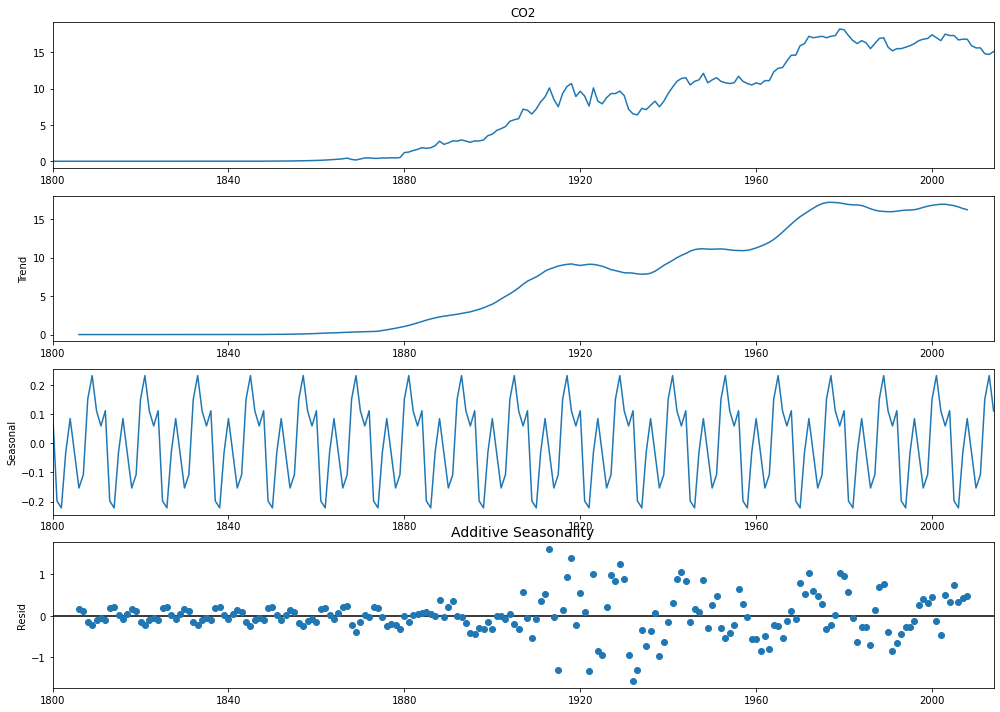

In [26]:
Df.set_index('Year',inplace=True)
decompose_ts_add = seasonal_decompose(Df.CO2,period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.title('Additive Seasonality', fontsize=14)
    plt.show()

#### Observing Following Points-
    - Trend increasing or decreasing.
    - In Seasonal Plot,Each cycle represents each year Trend.Also,Seasonal plot varies from +2 to -2.

### Checking Multiplicative Seasonal Decomposition


In [27]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

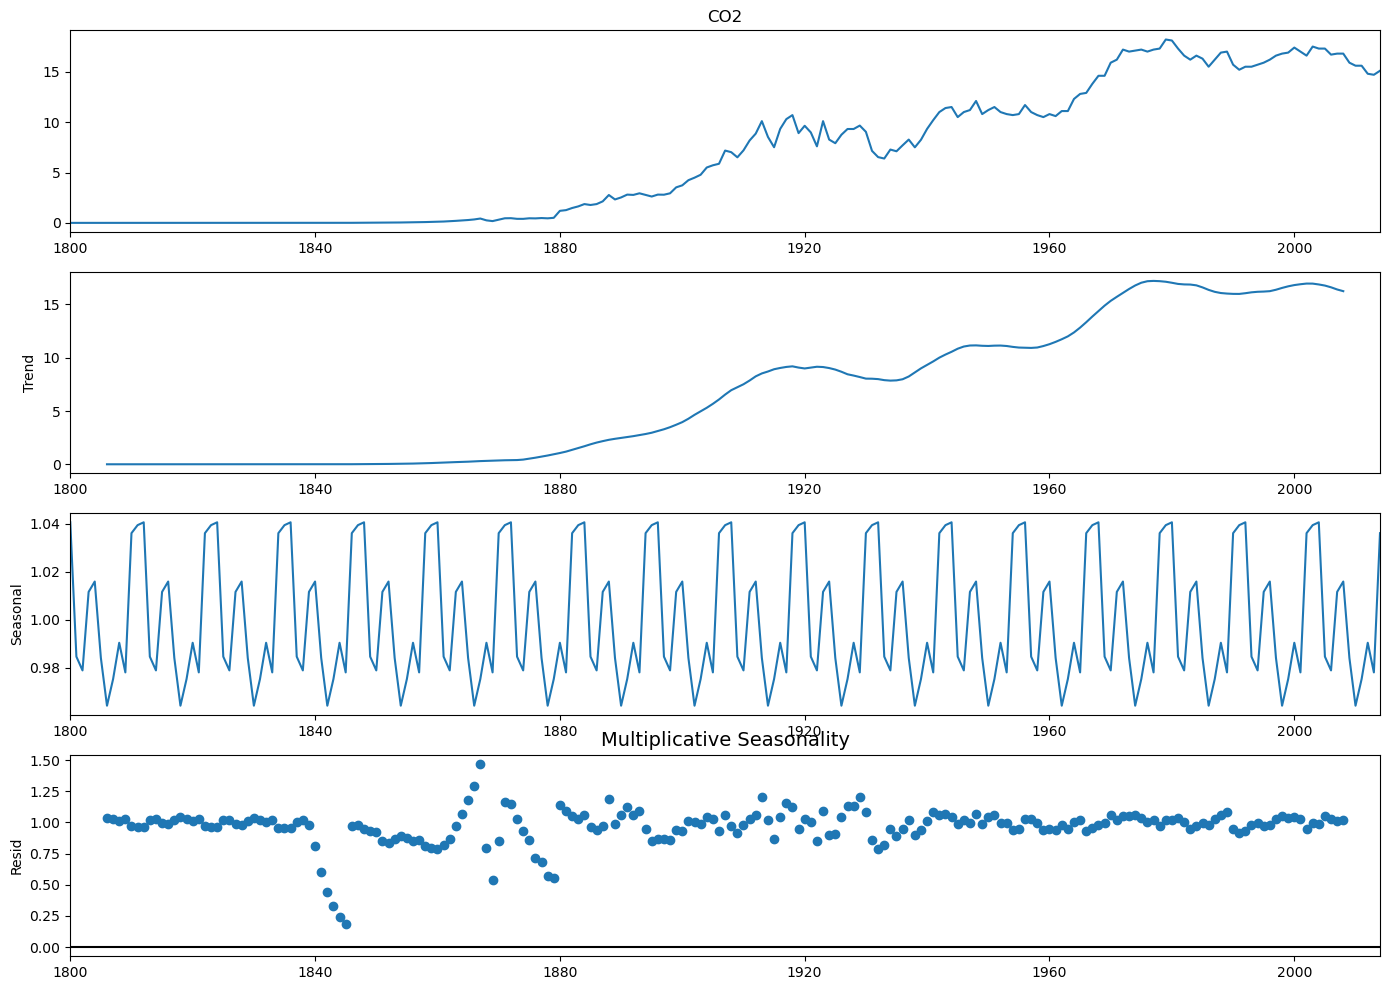

In [28]:
decompose_ts_add = seasonal_decompose(Df.CO2,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.title('Multiplicative Seasonality', fontsize=14)
    plt.show()

### Observing Following Points-
    - Seasonal Trend varies from 0.98 to 1.04.
    - The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year.


### As we can see there is an upward trend in the time series Data

# Checking Autocorrelation Function

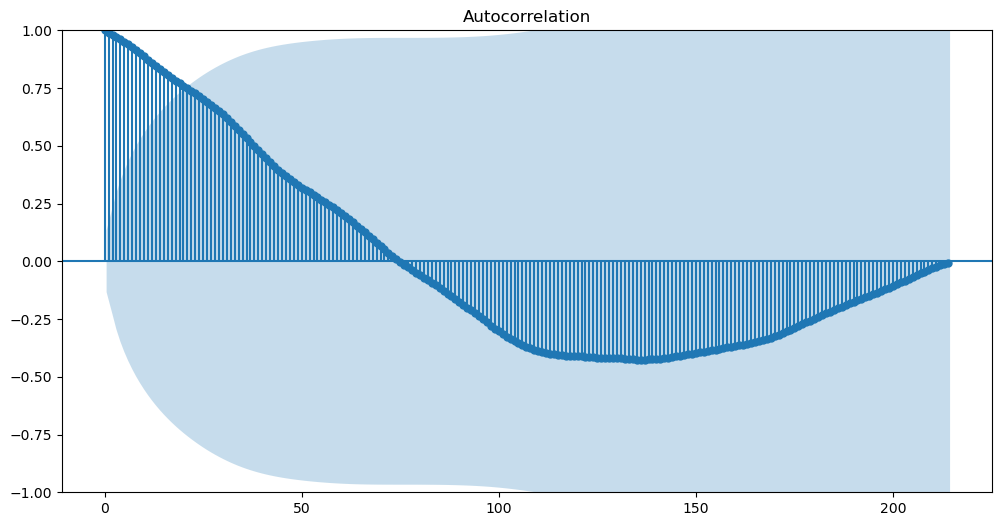

In [29]:
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(df.CO2,lags=214)
    plt.show()

#### Observing Following Facts:
     - Blue bars on an ACF plot above are the error bands and anything within these bars is not statistically significant. It means that, correlation values outside of this area are very likely a correlation and not a statistical fluke.
     -Notice that for a lag zero, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.
     
##### autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation

## Partial Autocorrelation Function (PACF)

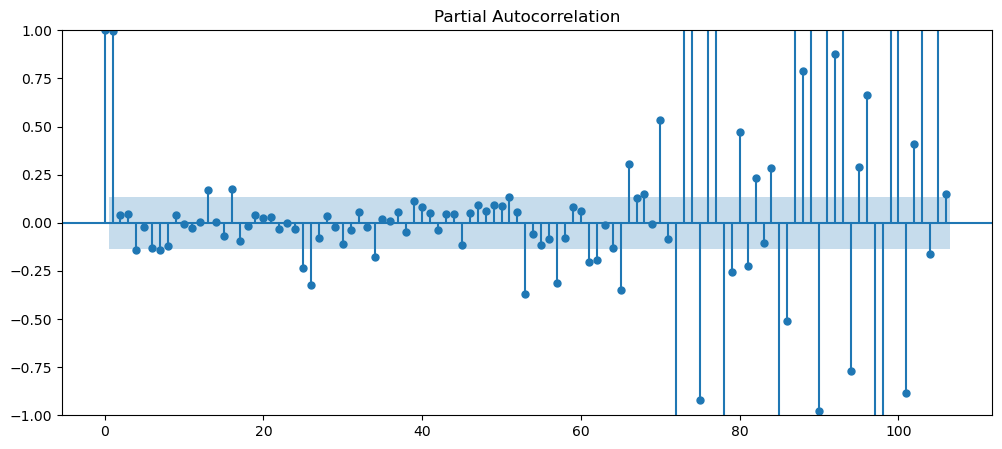

In [30]:
with plt.rc_context():
    plt.rc("figure", figsize=(12,5))
    tsa_plots.plot_pacf(df.CO2,lags=106)
    plt.show()

##### A partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

#### Dataset isn't stationary.for,that purpose we are using Dicky-Fuller test

### Making Data Stationary

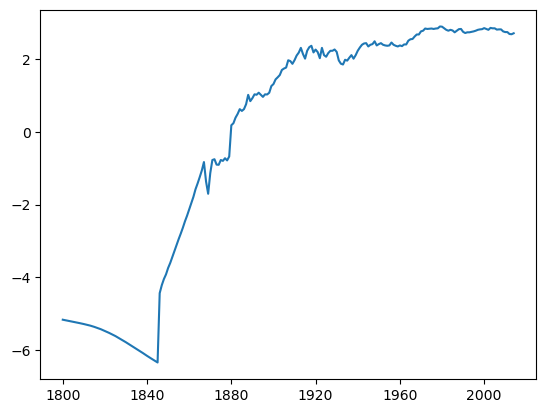

In [31]:
# Log Transformation
Df_log = np.log(Df)
plt.plot(Df_log)
plt.show()

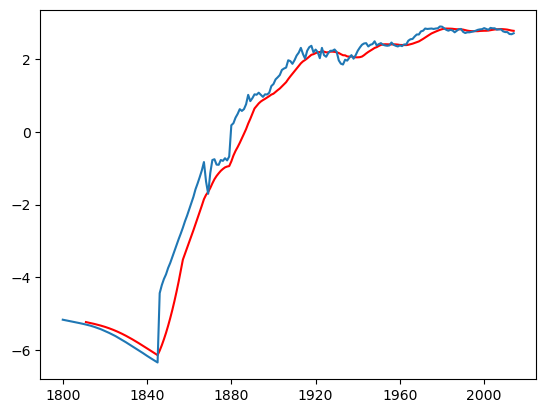

In [32]:
movingAverage= Df_log.rolling(window=12).mean()
movingSTD = Df_log.rolling(window=12).std()
plt.plot(movingAverage, color='red')
plt.plot(Df_log)
plt.show()

In [33]:
Df_logMinusmov_avg = Df_log-movingAverage
Df_logMinusmov_avg.head()

# remove null
Df_logMinusmov_avg.dropna(inplace=True)
Df_logMinusmov_avg.head()


,CO2
Year,
1811-01-01,-0.068296
1812-01-01,-0.070171
1813-01-01,-0.072085
1814-01-01,-0.075815
1815-01-01,-0.081437


###  Augmented Dickey-Fuller Test:

In [34]:
result=adfuller (Df_logMinusmov_avg)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key,value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -2.819611
p-value: 0.055527
Critical values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


#### p value is greater than critical value. We accept H0. Our data is not stationary

### First difference(Differencing method)

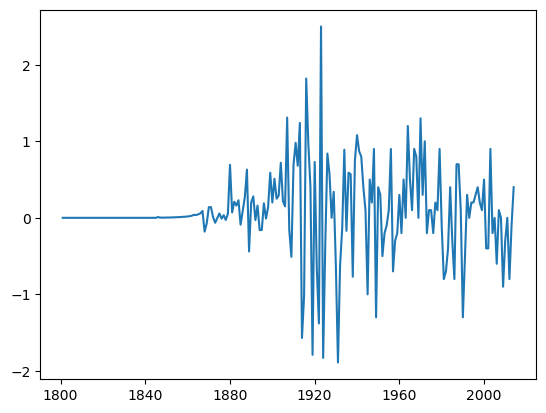

In [35]:
Df1= Df.diff()
plt.plot(Df1)

In [36]:
Df1.dropna(inplace=True)

### Augmented Dickey-Filler Test

In [37]:
result=adfuller (Df1)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key,value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -3.780005
p-value: 0.003119
Critical values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


##### P value is less than 0.05 hence,we can reject null hyphothesis.Data has no unit root & Stationary.

# Model Building

In [38]:
!pip install pmdarima

In [39]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## Splitting Data into Training & Testing

In [40]:
train= Df1.iloc[0:200,]
test = Df1.iloc[200:,]

In [41]:
train.shape, test.shape

((200, 1), (14, 1))

### Autorima Model

In [42]:
arima_model= auto_arima(train,
                       trace=True, allowmean=False, allowdrift = False,
                       start_p=0,d=0,start_q=0,max_p=8,max_d=3,max_q=8,start_P=0,D=0,start_Q=0,max_P=8,
                       max_D=3,max_Q=8,random_state=8,error_action='ignore',
                        suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=332.305, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=333.980, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=333.891, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=335.248, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=334.705, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.697 seconds


In [43]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [44]:
def forecast_accuracy(forecast, actual):
    rmse = sqrt(mean_squared_error(actual, forecast))
    return({ 'RMSE':rmse})

Plotting ARIMA model


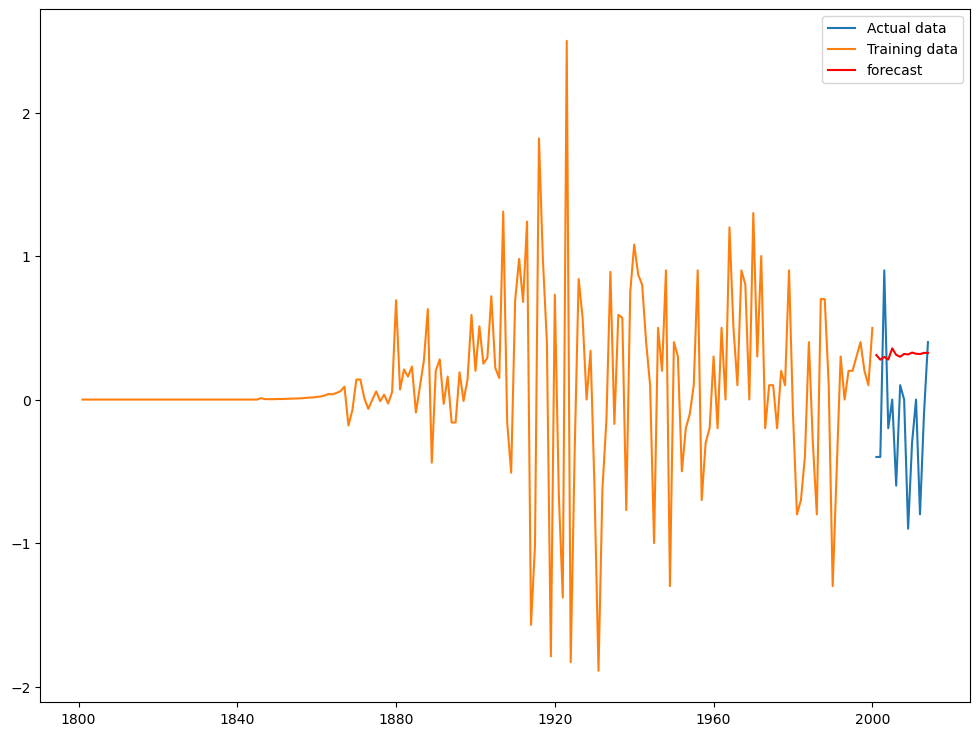

In [45]:
model = ARIMA(train, order=(4,2,1))
results_ARIMA = model.fit()
model_pred= results_ARIMA.predict(test.index[0],test.index[-1])

plt.figure(figsize=(12,9))
plt.plot(test,label='Actual data')
plt.plot(train,label='Training data')
plt.plot(model_pred, color='red',label='forecast')
plt.legend()
print('Plotting ARIMA model')
plt.show()

#### Checking Error on Testing Data

In [46]:
model_acc= forecast_accuracy(model_pred.values,test.values)
model_acc

{'RMSE': 0.6578318140669116}

###  Residue plot

Text(0.5, 1.0, 'Residue Plot')

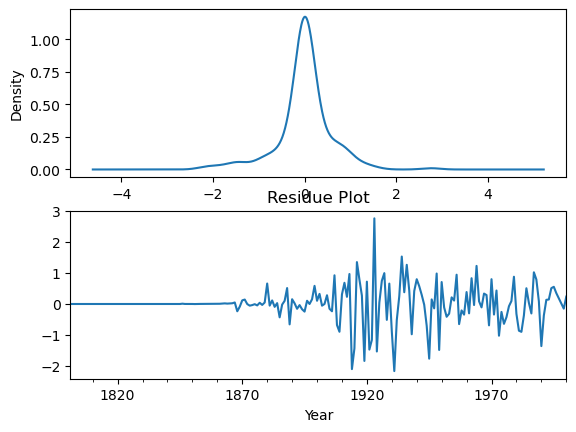

In [47]:
plt.subplot(211)
results_ARIMA.resid.plot(kind='kde')
plt.subplot(212)
results_ARIMA.resid.plot()
plt.title('Residue Plot')

### Checking ACF & PACF Plot

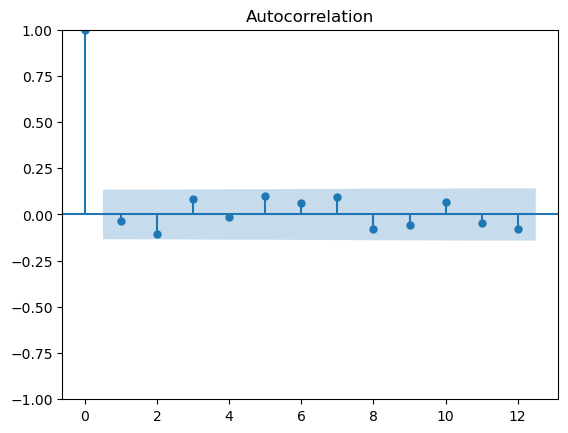

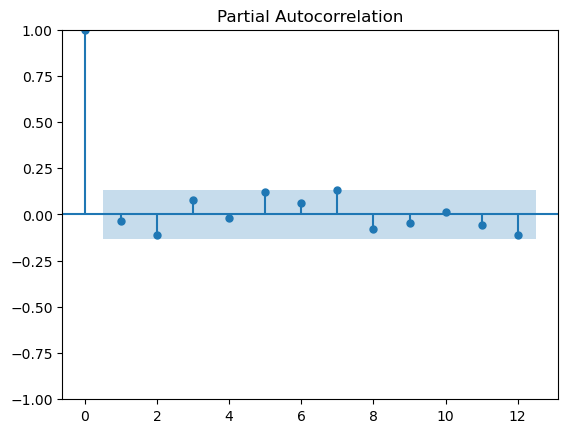

In [48]:
tsa_plots.plot_acf(Df1,lags=12)     
tsa_plots.plot_pacf(Df1,lags=12)
plt.show()

### Evaluating The Combinations of P,D,Q Values for an ARIMA Model

In [49]:
def evaluate_models(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [50]:
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0, 5)

evaluate_models(train.values, test.values,p_values, d_values, q_values)

Best ARIMANone RMSE=inf


#### Finding P,D,Q Values by using For Loop

In [51]:
import itertools

In [52]:
p = range(0,8)
q = range(0,8)
d = range(0,3)

In [53]:
pdq_combination = list(itertools.product(p,d,q))

In [54]:
rmse = []
order = []

for pdq in pdq_combination:
    try:
        model = ARIMA(train, order=pdq).fit()
        pred = model.predict(start=len(train),end=(len(Df1)-1))
        error = np.sqrt(mean_squared_error(test,pred))
        order.append(pdq)
        rmse.append(error)
    except:
        continue

In [55]:
value_pqd = pd.DataFrame(index=order,data=rmse,columns=['rmse'])
value_pqd.sort_values('rmse')

,rmse
"(3, 0, 4)",0.502653
"(5, 0, 4)",0.502890
"(4, 0, 3)",0.503525
"(4, 0, 4)",0.508698
"(4, 0, 1)",0.509013
...,...
"(6, 2, 0)",0.886905
"(3, 2, 0)",0.923636
"(2, 2, 0)",1.212206
"(1, 2, 0)",2.373699


# Arima Model On Stationary Data 

#### Model 1

Plotting ARIMA model1


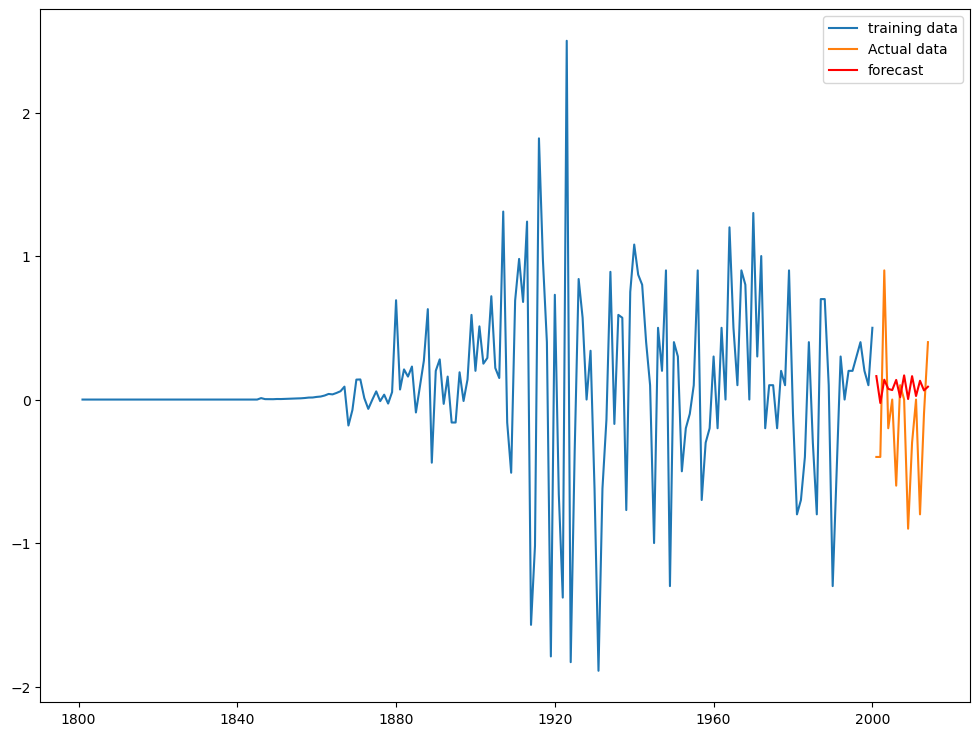

In [56]:
model1 = ARIMA(train, order=(5,1,3))   
results_ARIMA1 = model1.fit()
model1_pred= results_ARIMA1.predict(test.index[0],test.index[-1])
plt.figure(figsize=(12,9))
plt.plot(train,label='training data')
plt.plot(test,label='Actual data')
plt.plot(model1_pred, color='red',label='forecast')
print('Plotting ARIMA model1')
plt.legend()
plt.show()

### Checking Error on Testing Data

In [57]:
model1_acc= forecast_accuracy(model1_pred.values,test.values)
model1_acc

{'RMSE': 0.5153546971786069}

#### Model 2

Plotting ARIMA model2


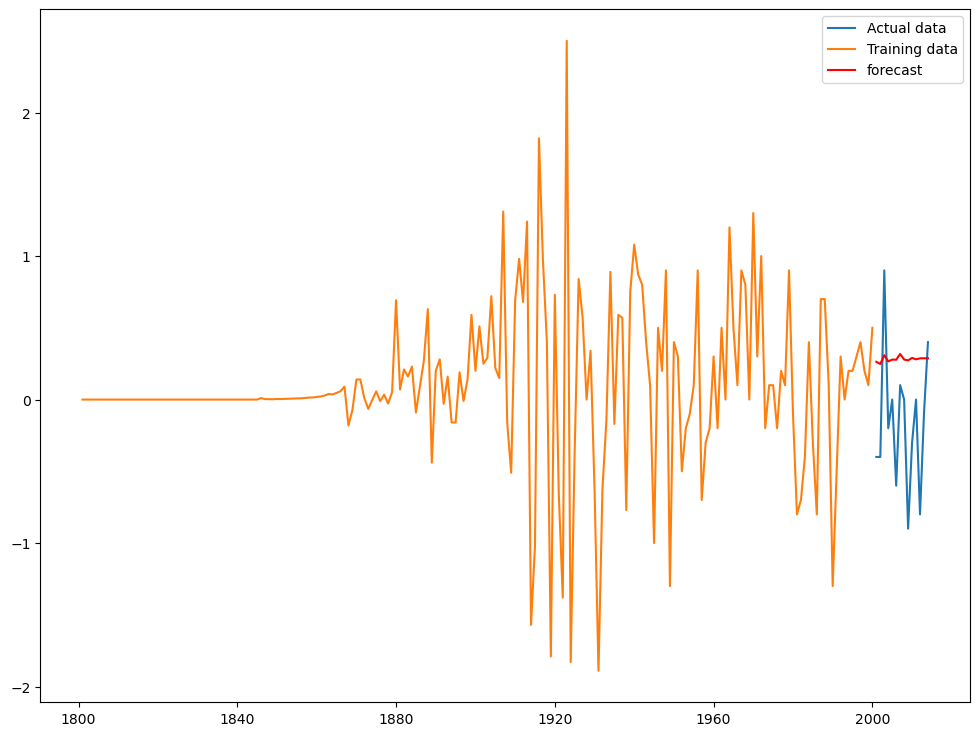

In [58]:
plt.figure(figsize=(12,9))
model2 = ARIMA(train, order=(7,1,0))
results_ARIMA2 = model2.fit()
model2_pred= results_ARIMA2.predict(test.index[0],test.index[-1])
plt.plot(test,label='Actual data')
plt.plot(train,label='Training data')
plt.plot(model2_pred, color='red',label='forecast')
print('Plotting ARIMA model2')
plt.legend()
plt.show()

In [59]:
model2_acc= forecast_accuracy(model2_pred.values,test.values)
model2_acc

{'RMSE': 0.6293124645966084}

#### Model 3

Plotting ARIMA model3


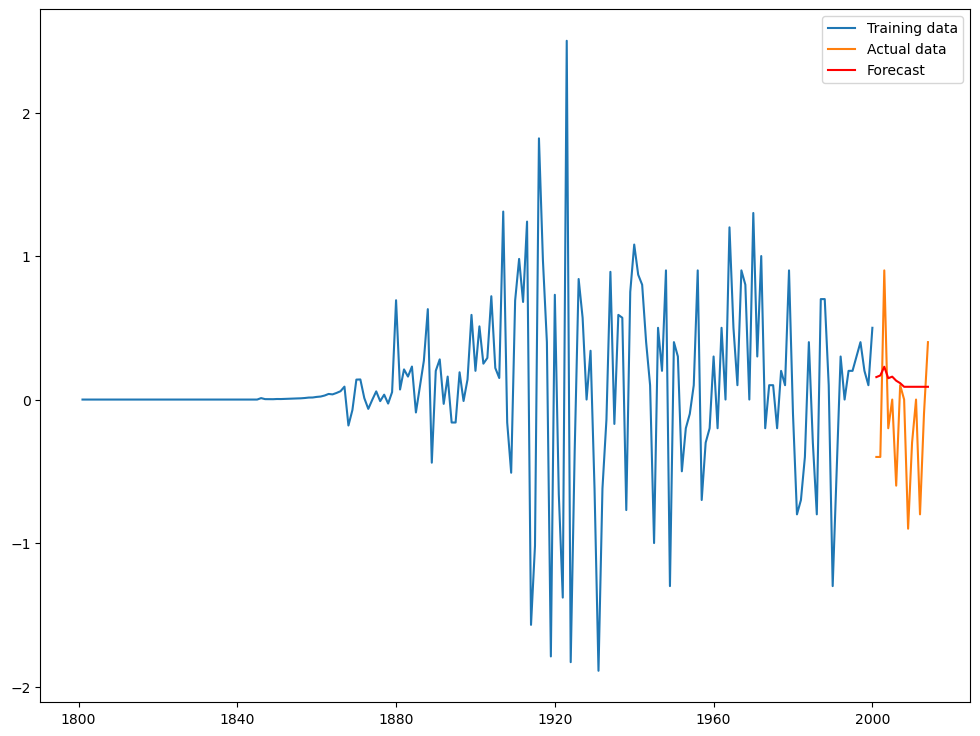

In [60]:
plt.figure(figsize=(12,9))
model3 = ARIMA(train, order=(0,1,8))
results_ARIMA3 = model3.fit()
model3_pred= results_ARIMA3.predict(test.index[0],test.index[-1])

plt.plot(train,label='Training data')
plt.plot(test,label='Actual data')
plt.plot(model3_pred, color='red',label='Forecast')
plt.legend()
print('Plotting ARIMA model3')

In [61]:
model3_acc= forecast_accuracy(model3_pred.values,test.values)
model3_acc

{'RMSE': 0.5232165990880128}

## Arima Model on Orignal Data

#### Spliiting The Data

In [62]:
train1 = Df.iloc[0:200,]
test1 = Df.iloc[200:,]

In [63]:
train1.shape, test1.shape

((200, 1), (15, 1))

In [64]:
rmse1 = []
order1 = []

for pdq in pdq_combination:
    try:
        model1 = ARIMA(train, order=pdq).fit()
        pred1 = model1.predict(start=len(train1),end=(len(Df)-1))
        error1 = np.sqrt(mean_squared_error(test1,pred1))
        order1.append(pdq)
        rmse1.append(error1)
    except:
        continue


In [65]:
value_pqd = pd.DataFrame(index=order1,data=rmse1,columns=['rmse1'])
value_pqd.sort_values('rmse1')

,rmse1
"(0, 2, 0)",12.904883
"(1, 2, 0)",14.351854
"(2, 2, 0)",15.439055
"(3, 2, 0)",15.736454
"(6, 2, 0)",15.778373
...,...
"(4, 0, 1)",16.284231
"(2, 0, 0)",16.284370
"(0, 0, 2)",16.284852
"(6, 1, 6)",16.290135


#### Plotting ACF & PACF Plot

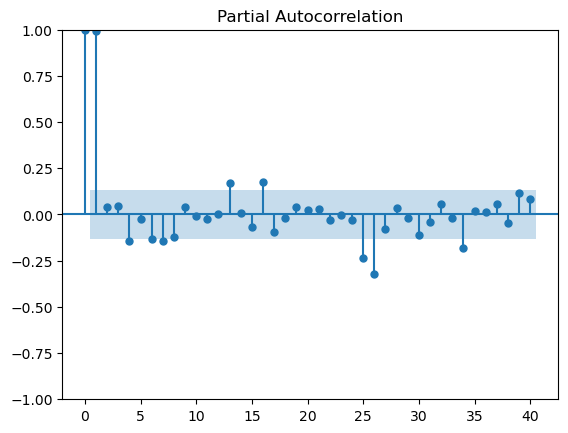

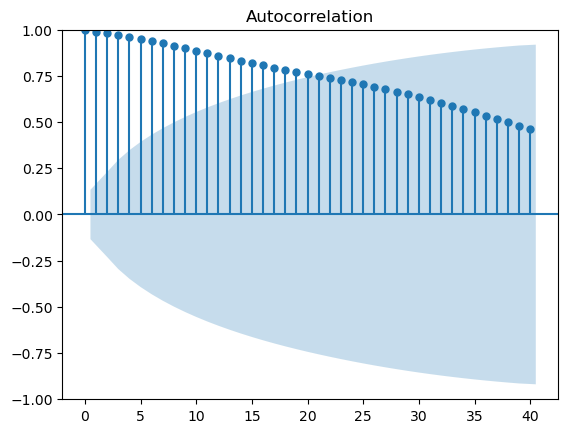

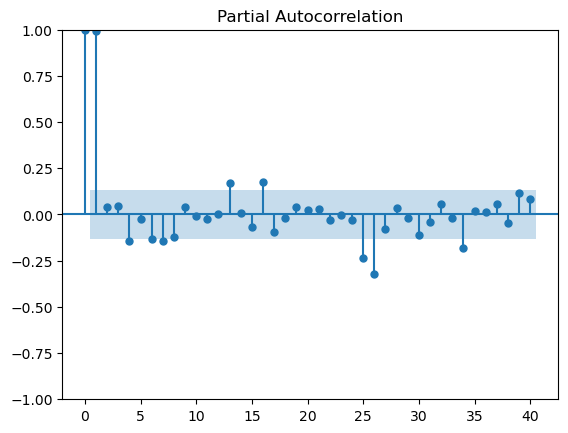

In [66]:
tsa_plots.plot_acf(Df,lags=40)
tsa_plots.plot_pacf(Df,lags=40)

Plotting ARIMA model4


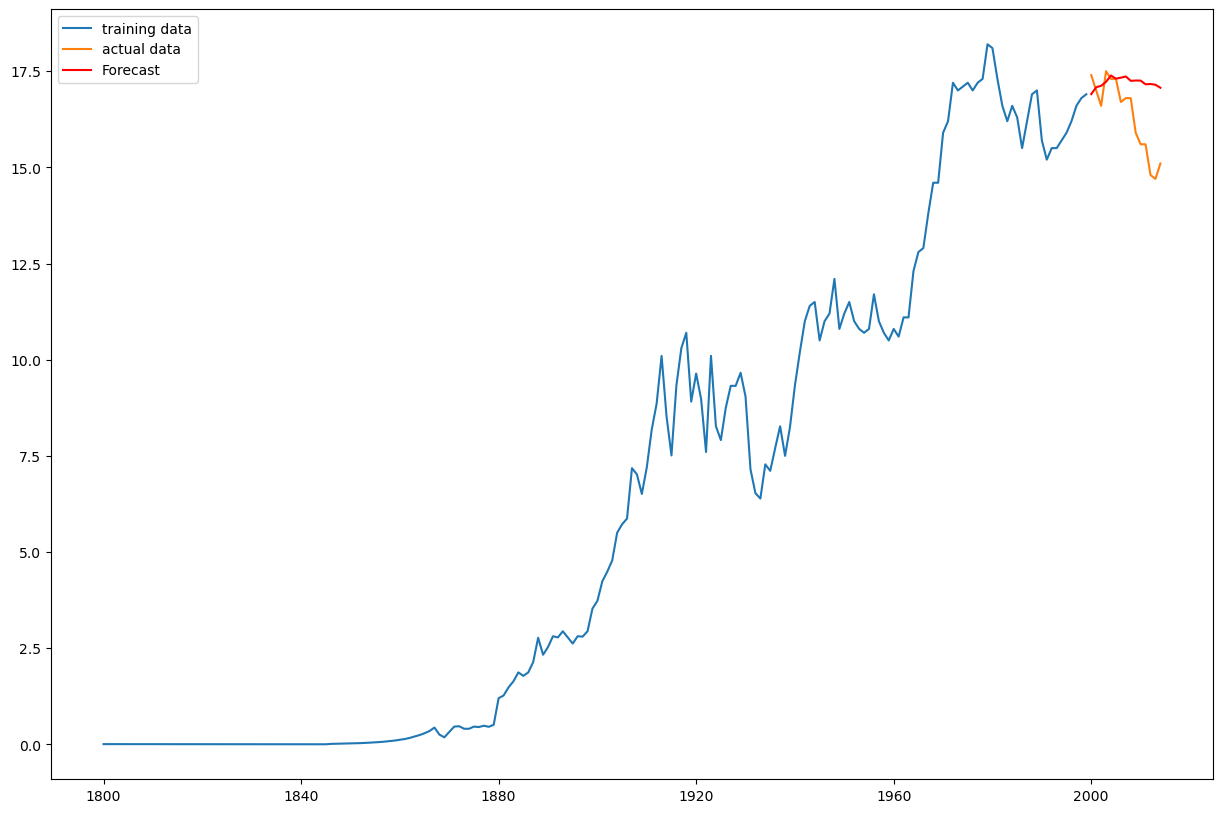

In [67]:
model4 = ARIMA(train1, order=(5,0,7))      
results_ARIMA4 = model4.fit()
model4_pred= results_ARIMA4.predict(test1.index[0],test1.index[-1])
plt.figure(figsize=(15,10))
plt.plot(train1,label='training data')
plt.plot(test1,label='actual data')
plt.plot(model4_pred, color='red',label='Forecast')
print('Plotting ARIMA model4')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [68]:
model4_acc= forecast_accuracy(model4_pred.values,test1.values)
model4_acc

{'RMSE': 1.2653546830637412}

## Using Data Driven Techniques

#### Holt Method/Double Exponential smoothing

In [69]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [70]:
hw_model = Holt(train1['CO2']).fit(smoothing_level=0.9, smoothing_slope=0.1)
pred_hw = hw_model.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hw,test1) 

{'RMSE': 1.7457536088695271}

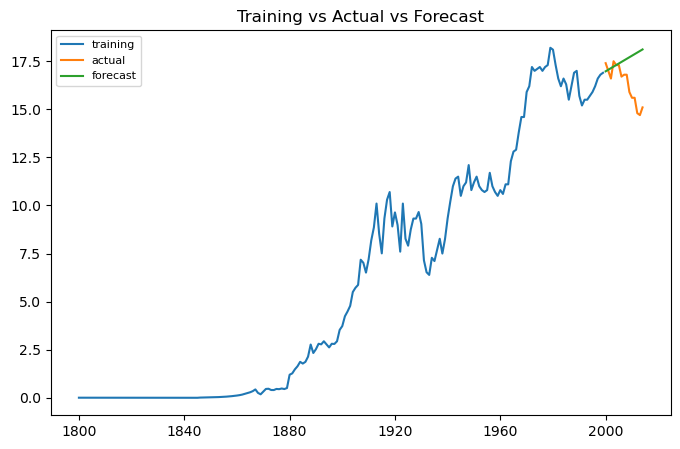

In [71]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Holt Winter Method/ Triple exponential

In [72]:
hwe_model_add = ExponentialSmoothing(train1,trend="add").fit()  
pred_hwe_add = hwe_model_add.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hwe_add,test1) 

{'RMSE': 1.779383946734146}

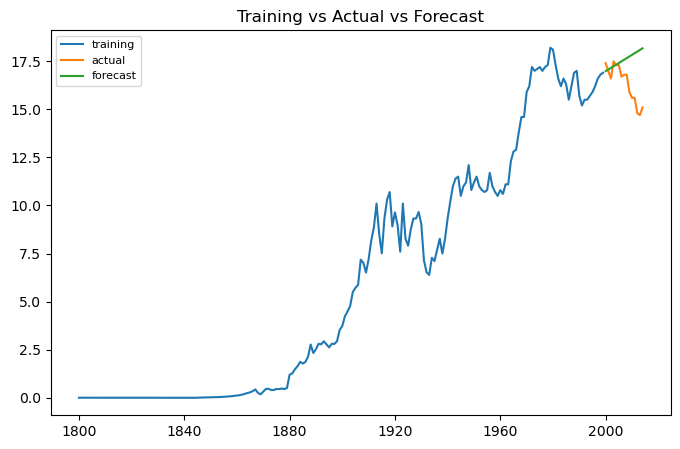

In [73]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hwe_add, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [74]:
hwe_model_mul = ExponentialSmoothing(train1,trend="mul").fit() 
pred_hwe_mul = hwe_model_mul.predict(start = test1.index[0],end = test1.index[-1])
forecast_accuracy(pred_hwe_mul,test1) 

{'RMSE': 2.2515278844490405}

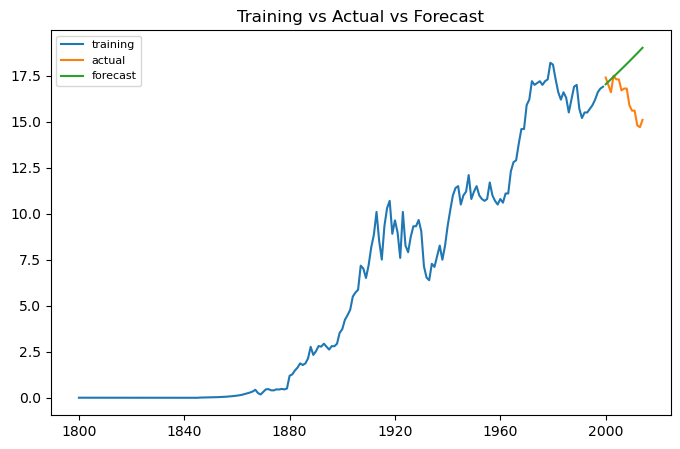

In [75]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual')
plt.plot(pred_hwe_mul, label='forecast')
plt.title('Training vs Actual vs Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [76]:
DF =[['Autoarima',0.4650,0.1059],['ARIMA_sd',0.4126,0.0939],['AR Model(7,1,0)',0.4627,0.1053],['MA Model(0,1,8)',0.4609,0.1049],['ARIMA_ns',1.4733,0.0809],['Holt Method model',1.7457,0.0959],['hwe_model_add',1.7793,0.0977],['hwe_model_mul',2.2645,0.1244]]
MODELS= pd.DataFrame(DF,columns=['Model','RMSE','Normalised RMSE'])
MODELS

,Model,RMSE,Normalised RMSE
0,Autoarima,0.4650,0.1059
1,ARIMA_sd,0.4126,0.0939
2,"AR Model(7,1,0)",0.4627,0.1053
3,"MA Model(0,1,8)",0.4609,0.1049
4,ARIMA_ns,1.4733,0.0809
5,Holt Method model,1.7457,0.0959
6,hwe_model_add,1.7793,0.0977
7,hwe_model_mul,2.2645,0.1244


In [77]:
MODELS.sort_values(by=['Normalised RMSE'],inplace=True)
MODELS

,Model,RMSE,Normalised RMSE
4,ARIMA_ns,1.4733,0.0809
1,ARIMA_sd,0.4126,0.0939
5,Holt Method model,1.7457,0.0959
6,hwe_model_add,1.7793,0.0977
3,"MA Model(0,1,8)",0.4609,0.1049
2,"AR Model(7,1,0)",0.4627,0.1053
0,Autoarima,0.4650,0.1059
7,hwe_model_mul,2.2645,0.1244


#### For Non Stationary Data

In [78]:
MaxminusMin = 18.200000-0.001750
normalised_RMSE = MODELS.RMSE[7]/ MaxminusMin
normalised_RMSE

0.1244350418309453

#### For Stationary Data

In [79]:
MaxminusMin_stationarydata = 2.500 + 1.890
normalised_RMSE1 = MODELS.RMSE[0]/ MaxminusMin_stationarydata
normalised_RMSE1

0.1059225512528474

# Final Model

### Finally we are going to choose ARIMA(5,0,7) as a final model.

In [80]:
final_model = ARIMA(Df, order=(5,0,7))   
final_arima = final_model.fit()

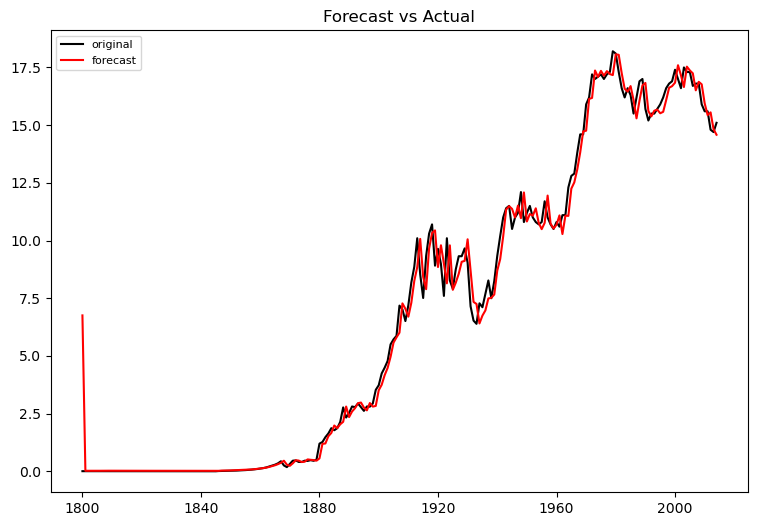

In [81]:
plt.figure(figsize=(9,6),dpi=100 )
plt.plot(Df, label='original',color='black')
plt.plot(final_arima.fittedvalues, label='forecast',color='red')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Forecasting for next 20 Years

In [82]:
forecast=final_arima.forecast(20)

In [85]:
from pandas.tseries.frequencies import to_offset

In [86]:
future_dates =[Df.index[-1]+ DateOffset(Years=x)for x in range(0,21)]
future_df=pd.DataFrame(index=future_dates[1:],columns=Df.columns)
future_df.tail()
len(future_df)

NameError: name 'DateOffset' is not defined

## Model Building

In [ ]:
Data_1=pd.read_excel('CO2 dataset.xlsx',index_col='Year',parse_dates=True)
Data_1.head()

In [ ]:
Data_1.dtype

In [ ]:
Data_1.index = pd.DatetimeIndex(Data_1.index.values,freq=Data_1.index.inferred_freq)
Data_1.head()
